## Example: Run a Model

This notebook demonstrates how to import an EPANET MSX File, execute a simulation, and conduct a simple analysis of the results

Import Packages

In [1]:


import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wntr


main_folder = os.path.dirname(os.getcwd())
sys.path.insert(0,main_folder+'\Function_Libraries')
sys.path.insert(0,main_folder+'\INP_and_MSX_Files')

#Set working directory
os.chdir(main_folder)

import MSXPY_toolkit as mpy
import epanet_toolkit as epa
import msx_toolkit as msx

print(main_folder)

C:\Users\frank\Documents\Box Sync\working files\Leap-hi\Epanet-MSX\MSXpy\MSXPY


##### Import Model

The .inp file and .msx file are imported using the ENopen and MSXopen commands. In addition, the network is imported into WNTR. WNTR is not used for simulation, but is used for post-processsing of the results to show the results on a map of the network layout. Importing into WNTR is not required to run a simulation.

Opening two EPANET MSX models at the same time causes issues. Therfore, as a precaution, the first step is to close any existing EPANET MSX models that may already be open.

In [3]:

#Close any files that were already open
epa.ENclose()
msx.MSXclose()

#open the inp file

inp_file = r'INP_and_MSX_Files/Net1.inp'
epa.ENopen(inp_file,'report.rpt')
#open msx file
msx_file = r'INP_and_MSX_Files/Net1-NH2CL_JV_TOC.msx'
msx.MSXopen(msx_file)

#Import wntr model to be used later for plot
wn = wntr.network.WaterNetworkModel(inp_file)



##### Run Model

The model is set to run for a duration of 14 days by using the <code>ENsettimeparam</code> function from the EPANET toolbox. Next, the hydraulic simulation is executed using the <code>MSXsolveH</code> function from the MSX toolbox. Finally, <code>MSXRunQual</code> is called to execute the water quality simulation and store results in a python dictionary.

In [4]:
#Number of days to run model
days=14

#0 for duration
epa.ENsettimeparam(0, int(days*24*3600))

#Solve the hydraulics of the model
msx.MSXsolveH()   

#Run the reaction model
print('Running Sim')
my_results=mpy.MSXRunQual(links=[],species=['cNH2CL','T'],by_species='yes',t_start=days-1)
print('Ending Sim')


Running Sim
Ending Sim


##### Timeseries Plot

Use matplotlib to plot the monochloramine concentration at a given node

Text(0.5, 0, 'Simulation Time')

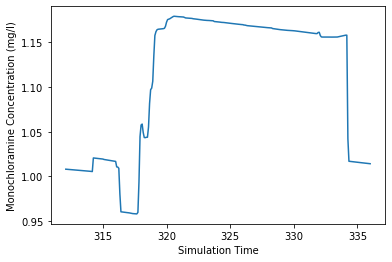

In [5]:
#Plot a timeseries of monochloramine concentration in node 32

plt.figure()
plt.plot(my_results['cNH2CL']['node'].index/3600,my_results['cNH2CL']['node']['32'])
plt.ylabel('Monochloramine Concentration (mg/l)')
plt.xlabel('Simulation Time')



##### Map of Results

Create a simple map where the mean concentration is represented by node color and the standard deviation is represented by the node size.

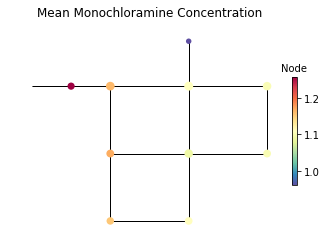

In [6]:
#Make a map of the mean concentrations with the standard deviation as the size

color_var=my_results['cNH2CL']['node'].mean()
size_var=my_results['cNH2CL']['node'].std()
title='Mean Monochloramine Concentration'
nodes=mpy.GetNodeNameList()
nodes.remove('9')
mpy.Network2DPlot(wn,color_var,size_var,title,nodes,min_scale=30,max_scale=80,show_inds=nodes)